In [1]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [2]:
subscription_key = '9f53c7a2f68249aa8343aa4aa7400ed5'
face_api_url = 'https://labuser66face.cognitiveservices.azure.com/face/v1.0/detect'

In [3]:
image_url = 'https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F9vcjo%2FbtrLTUZZhgy%2FR3lzaRUeRzKIsTIhRSYnYk%2Fimg.jpg'

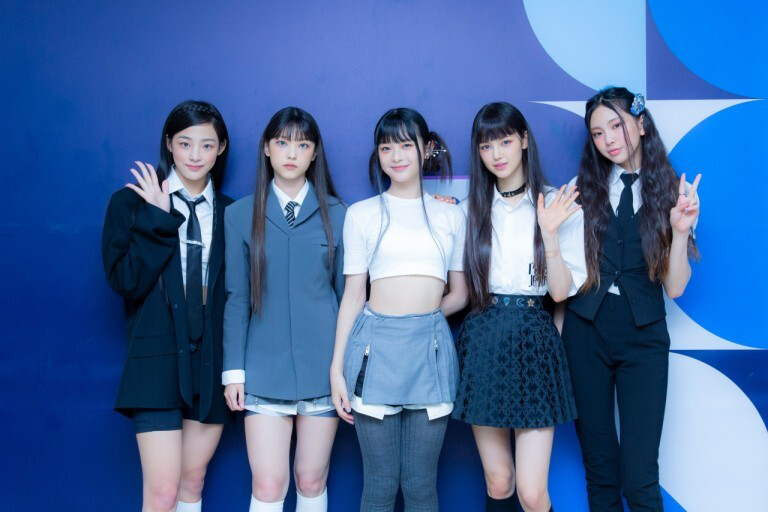

In [37]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [38]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}

In [39]:
params = {
    'returnFaceID':'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes':'Accessories,smile'
}

In [40]:
data = {'url':image_url}

In [41]:
response = requests.post(face_api_url, params=params,headers = headers,json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 132, 'left': 268, 'width': 46, 'height': 46},
  'faceAttributes': {'smile': 0.0, 'accessories': []}},
 {'faceRectangle': {'top': 132, 'left': 172, 'width': 45, 'height': 45},
  'faceAttributes': {'smile': 0.909, 'accessories': []}},
 {'faceRectangle': {'top': 117, 'left': 588, 'width': 45, 'height': 45},
  'faceAttributes': {'smile': 0.007, 'accessories': []}},
 {'faceRectangle': {'top': 134, 'left': 376, 'width': 44, 'height': 44},
  'faceAttributes': {'smile': 1.0, 'accessories': []}},
 {'faceRectangle': {'top': 133, 'left': 476, 'width': 42, 'height': 42},
  'faceAttributes': {'smile': 0.298, 'accessories': []}}]

In [42]:
draw = ImageDraw.Draw(image)

In [43]:
from turtle import width


def DrawBox(faces):
    for face in faces:
        rect = face['faceRectangle']
        left = rect['left']
        top = rect['top']
        width = rect['width']
        height = rect['height']

        draw.rectangle(((left,top),(left+width,top+height)),outline='orange') # 그린다.사각형
        face_attiributes = face['faceAttributes']
        smile = face_attiributes['smile']
        draw.text((left+10,top-10),str(smile),fill='red')

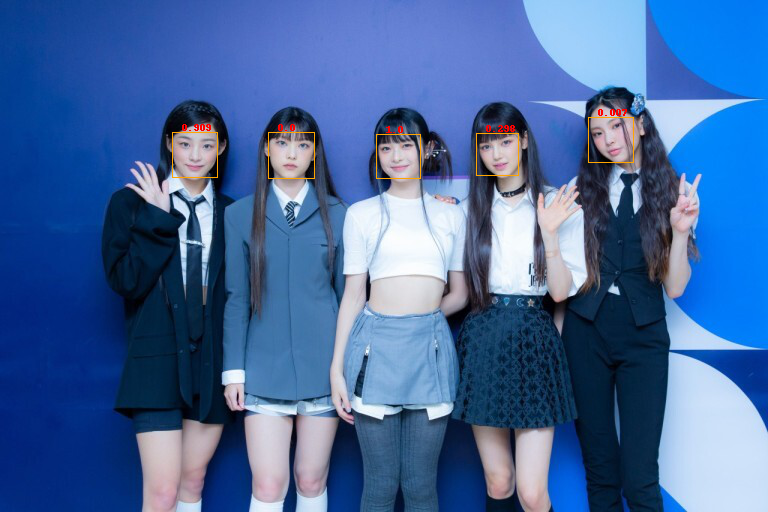

In [44]:
DrawBox(faces)
image